# Problem Set 1: Probability and Logic, Cumulant Generating Function, Cauchy Distribution

## Name: Askold Vilkha

In [1]:
%matplotlib inline 
# magic command to display plots inline in the notebook - might not be necessary for your environment

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# lines below are for setting the default plot size and font size
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1. Exercises in Logic and Probability

These are all of the problems at the end of Chapter 2 of Gregory

**a)** Construct a truth table, or use Numpy boolean arrays, to show
$$\overline{A},\overline{B} = \overline{A+B}$$

Here we define boolean arrays for $\overline{A}$ and $\overline{B}$

In [3]:
A_bool = np.array([True, True, False, False])
B_bool = np.array([True, False, True, False])
notA_bool = ~A_bool # ~ is the logical NOT operator in Python
notB_bool = ~B_bool

Let's do the intersection ($\overline{A},\overline{B}$) of these boolean arrays in Python and show the result:

In [4]:
notA_bool_and_notB_bool = notA_bool & notB_bool # & is the logical AND operator in Python
notA_bool_and_notB_bool

array([False, False, False,  True])

Note, that we get `True` for the intersection only if both $\overline{A}$ and $\overline{B}$ are `True`. (Or in other words, if both $A$ and $B$ are `False`, to make it less confusing)


To get $\overline{A+B}$ we first need to do the union $A+B$ and after define $\overline{A+B}$ and finally show the result

In [5]:
A_or_B_bool = A_bool | B_bool # | is the logical OR operator in Python
not_A_or_B_bool = ~A_or_B_bool
not_A_or_B_bool

array([False, False, False,  True])

As we can see, the results are the same. This makes total sense if we recall that logical `True` is equivalent to `1` and logical `False` is equivalent to `0`. Then, the union of $A$ and $B$ is equivalent to the sum of $A$ and $B$. Thus, from the union of $A$ and $B$ we would get (1, 1, 1, 0 / `True`, `True`, `True`, `False`). The negation of this union reverses the values, so we get (0, 0, 0, 1 / `False`, `False`, `False`, `True`), which is equivalent to the intersection of $\overline{A}$ and $\overline{B}$. Hence, the intersection would of the negations of $A$ and $B$ gives us `True` only if both $A$ and $B$ are `False`, which is equivalent to the negation of the union of $A$ and $B$, since the union of $A$ and $B$ gives us `True` only if at least one of $A$ and $B$ is `True`. The only way to get `True` from the negation of the union is if both $A$ and $B$ are `False`.

**b)** Construct a truth table, or use Numpy boolean arrays, to show
$$A+(B,C)=(A+B),(A+C)$$

First of all we need to define boolean arrays and after we will do the "logical math"

In [6]:
A_bool = np.array([True, True, True, True, False, False, False, False])
B_bool = np.array([True, True, False, False, True, True, False, False])
C_bool = np.array([True, False, True, False, True, False, True, False])

Let's go to the math then. We start with $A+(B,C)$

In [7]:
B_and_C_bool = B_bool & C_bool
A_bool_or_B_and_C_bool = A_bool | B_and_C_bool
A_bool_or_B_and_C_bool

array([ True,  True,  True,  True,  True, False, False, False])

Now we'll do the right part of the equation and compare it with the left, which we got above

In [8]:
A_or_B_bool = A_bool | B_bool
A_or_C_bool = A_bool | C_bool
A_or_B_bool_and_A_or_C_bool = A_or_B_bool & A_or_C_bool
A_or_B_bool_and_A_or_C_bool

array([ True,  True,  True,  True,  True, False, False, False])

The results are the same!

**c)** With reference to Table 2.2:

| $A$ $B$ | TT | TF | FT | FF |
| --- | --- | --- | --- | --- |
| $f_8(A,B)$ | T | F | T | T |

construct a truth table, or use Numpy boolean arrays, to show that
$$f_8(A,B) = \overline{A} + B$$

We are going to solve this task with boolean arrays. First of all, let's redefine $f_8(A,B)$ as a boolean array in Python.

In [9]:
f_8 = np.array([True, False, True, True])
f_8

array([ True, False,  True,  True])

Now we'll define $A, B$ and $\overline{A}$. We'll have done the calculations and compare the particular results right here as well.

In [10]:
A_bool = np.array([True, True, False, False])
B_bool = np.array([True, False, True, False])
notA_bool = ~A_bool
notA_bool_or_B_bool = notA_bool | B_bool
notA_bool_or_B_bool

array([ True, False,  True,  True])

As we can see above, $f_8(A,B)=\overline{A}+B$ indeed!

In this exercise, we actually revisit the principle of logical sum used in 1.a). The logical sum of `True` and `False` is `True`, and the logical sum of `False` and `True` is `True`. The logical sum of `True` and `True` is `True` as well. The only case when the logical sum is `False` is when both $A$ and $B$ are `False`. The truth table for $f_8(A,B)$ is slightly more complicated than that, since we have $f_8(A,B) = \overline{A} + B$ but not just $A + B$.  

**d)** Based on the available evidence, the probability that Jones is guilty is
equal to $0.7$, the probability that Susan is guilty is equal to $0.6$,
and the probability that both are guilty is equal to $0.5$. Compute the
probability that Jones is guilty and/or Susan is guilty.

Let $ P(J)$ be the probability that Jones is guilty, and $P(S)$ be the probability that Susan is guilty. We know that: 
 - $P(J)=0.7$ 
 - $P(S)=0.6$
 - $P(J,S)=0.5$ , where $P(J,S)$ is the probability that both are guilty.

If Jones **and** Susan are guilty - that means both are guilty and the probability of that event is equal to $P(J,S)=0.5$.
However, if we want to find out the probability that Jones **or** Susan is guilty - then we have to add the probabilities for each event and subtract the probability of both events happening simultaneously to not count them twice.
$$ P(J or S)=P(J)+P(S)-P(J,S)=0.6+0.7-0.5=0.8 $$

**e)** The probability that Mr. Smith will make a donation is equal to $0.5$,
if his brother Harry has made a donation. The probability that Harry
will make a donation is equal to $0.02$. What is the probability that
both men will make a donation?

In this case we have Harry's donation as a condition for Mr. Smith's one. So, to derive the probability that both will donate any sum, we need to take that into account. Let $P(H)=0.02$ be the probability that Harry makes a donation. Then $P(S)=0.5$ is the probability of Mr. Smith's donation. $P(S,H)$ will be the probability of both men donating. For conditional probability we have to multiply the condition probability with the event's probability, i. e. $P(S,H)=P(H)*P(S)$. Since both events must happen, we have logical "and", which means multiplication.
$$So: P(S,H)=P(H)*P(S)=0.02*0.5=0.01$$
It is the probability of both men donating.

## 2. Cumulant Generating Function

Given the moment generating function
$M(t)=E\left[e^{t\color{royalblue}{X}}\right]$ from which you can
calculate $E\left[{\color{royalblue}{X}}^k\right]=M^{(k)}(0)$, and in
particular $M(0)=1$, $M'(0)=E\left[{\color{royalblue}{X}}\right]=\mu_X$,
and $M''(0)=E\left[{\color{royalblue}{X}}^2\right]$, it is often
convenient to define the cumulant generating function
$\psi(t)=\ln M(t)$.

**a)** Show that $\psi(0)=0$ and $\psi'(0)=E\left[{\color{royalblue}{X}}\right]$.

We already know that $M(0)=1$, so $\psi(0)=\ln M(0) =\ln 1=0$. Let's work out the first derivative. If we take derivative of $\psi(t)=\ln M(t)$ we get $$\psi(t)'=(\ln M(t))'=(\ln' M(t) )M'(t)=\frac{M'(t)}{M(t)}$$ Let's put $t=0$ into this:
$$\psi'(0)=\frac{M'(0)}{M(0)}=\frac{E\left[{X}\right]}{1}=E\left[{X}\right]$$


**b)** Show that $\psi''(0)=\mathop{\mathrm{Var}}({\color{royalblue}{X}})$.

Let's go to the second derivative of $\psi(t)$.
$$\psi''(t)=\left(\frac{M'(t)}{M(t)}\right)'=\frac{M''(t)}{M(t)}-\frac{M'^2(t)}{M^2(t)}$$
If $t=0:$
$$\psi''(0)=\frac{M''(0)}{M(0)}-\frac{M'^2(0)}{M^2(0)}=\frac{E\left[{X^2}\right]}{1}-\frac{E\left[{X}\right]^2}{1}=E\left[{X^2}\right]-E\left[{X}\right]^2=E\left[{X^2}\right]-\mu_x^2=\mathrm{Var}(X)$$

## 3. Cauchy Distribution

Let $\color{royalblue}{X}$ be a Cauchy random variable with pdf
$$f_X(x) = \frac{1}{\pi}\frac{1}{1+x^2} \qquad -\infty < x < \infty$$

**a)** Define $\color{royalblue}{Y}$ such that
${\color{royalblue}{X}}=\tan\color{royalblue}{Y}$ and
$-\frac{\pi}{2}<{\color{royalblue}{Y}}<\frac{\pi}{2}$ and work out the pdf
$f_Y(y)$.

According to the formula for the change of variables: 
$$f_Y(y)=f_X(x)\left|\frac{dx}{dy}\right|$$
$$f_Y(y)=\frac{f_X(x)}{y'(x)}$$ 
We do know that $x=\tan y$, so $y=\arctan x$. Let's work out the derivative:$$y'(x)=\arctan'x=\frac{1}{1+x^2}$$
Now we plug this result into our formula and finally get $f_Y(y)$: 
$$f_Y(y)=\frac{\frac{1}{\pi}\frac{1}{1+x^2}}{\arctan'x}=\frac{1}{\pi}\frac{\frac{1}{1+x^2}}{\frac{1}{1+x^2}}=\frac{1}{\pi}$$
Thus, $f_Y(y)=\frac{1}{\pi}$, for $-\frac{\pi}{2}<y<\frac{\pi}{2}$.

**b)** To explore the behavior numerically, we'll generate a Monte Carlo ensemble of Cauchy random variables as follows:

In [11]:
Nmonte = 10**5
np.random.seed(8675309) # for a given random seed the random number sequence is reproducible, thus if one wants to get new random numbers, one should change the seed
X_I = stats.cauchy.rvs(size = Nmonte)

In class, we stated that the expectation value $E({\color{royalblue}{X}})$ was undefined for a Cauchy random variable, but you might expect it to be zero just by symmetry ($f_X(-x)=f_X(x)$).  Try to estimate $E({\color{royalblue}{X}})$ using your Monte Carlo example.

In [12]:
np.mean(X_I)

-0.2964486983252536

Does the value you get seem like a reasonable estimate?  Why or why not?

As for me, it is. It is close enough to zero. Considering that we have $10^5$ elements, we won't expect it to be exactly 0, as any statistical data. Cauchy is a symmetrical distribution, so zero seems reasonable estimate.

However, for the Cauchy distribution, the expectation value is undefined. The reason is that the tails of the distribution are so heavy that the expectation value does not exist. The expectation value is defined as the integral of the random variable times the probability density function. For the Cauchy distribution, the tails are so heavy that the integral does not converge. This is why the expectation value is undefined. And if one tries this test with a different seed for the random number generator, the result will be different. 

In [13]:
newX_I = stats.cauchy.rvs(size = Nmonte)
np.mean(newX_I)

-0.4364992748395689

In [14]:
newnewX_I = stats.cauchy.rvs(size = Nmonte)
np.mean(newnewX_I)

6.591857034752866

**c)** Usually, if you don't know the typical values of a random variable, you can get a decent-looking histogram by just choosing the number of bins to be the square root of the number Monte Carlo samples, and letting them be set automatically.

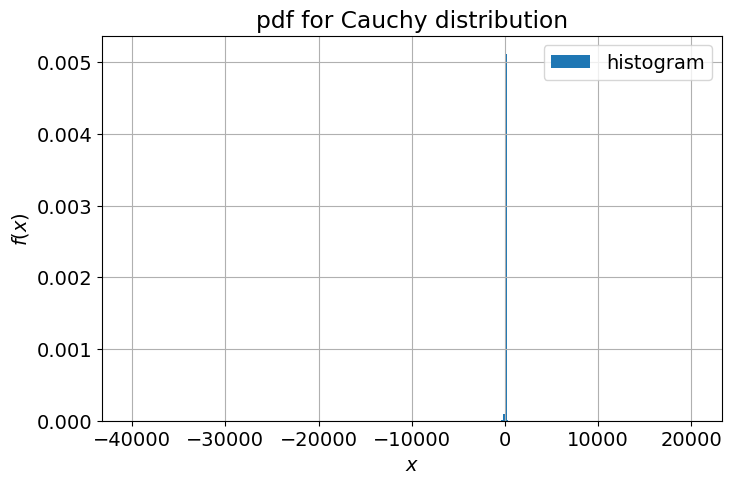

In [15]:
numbins = int(np.sqrt(Nmonte))
plt.hist(X_I,bins = numbins, density = True, label = 'histogram');
plt.grid(True); plt.legend();
plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$'); plt.title(r'pdf for Cauchy distribution');

Why did you not get a useful histogram in this case?

The most evident problem of the histogram is it's boundaries. They are too huge, so we can't see the actual area where most of the values are concentrated. Probably, the histogram here starts from the minimal element of `X_I` and there goes to other ones, but that is making the histogram unreadable. So we need to make more explicit definition of the boundaries to get a useful histogram. Here, the problem of heavy tails is evident

**d)** To get a useful histogram, we can instead choose what turns out to be a more reasonable set of values.

In [16]:
xmax = 10; xmin = -xmax
x_x = np.linspace(xmin,xmax,numbins)

Using this `x_x` as both the set of bin values and the set of values to evaluate the pdf, produce a plot containing a properly-normalized histogram and a curve showing the pdf $f_X(x)$.  Use the explicit formula for $f_X(x)$ above rather than the helper function `stats.cauchy.pdf()`.

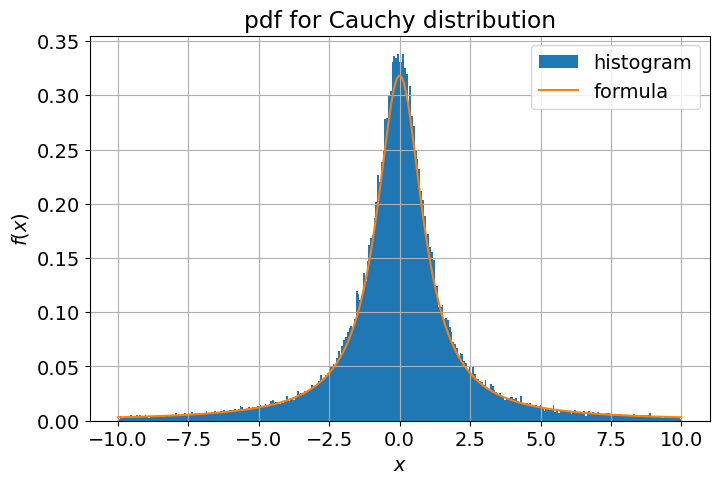

In [17]:
fcauchy = 1 / np.pi / (1 + x_x**2)
plt.hist(X_I, bins = x_x, density = True, label = 'histogram')
plt.plot(x_x, fcauchy, label = 'formula')
plt.grid(True); plt.legend();
plt.xlabel(r'$x$'); plt.ylabel(r'$f(x)$'); plt.title(r'pdf for Cauchy distribution');

**e)** Use the transformation $\color{royalblue}{Y}=\tan^{-1}\color{royalblue}{X}$ defined in part a) above to construct a Monte Carlo ensemble `Y_I` from our `X_I`.  Plot a normalized (i.e., using `density=True`) histogram of the `Y_I` values.  (In this case, `bins=numbins` will be sufficient to give a reasonable estimate.)

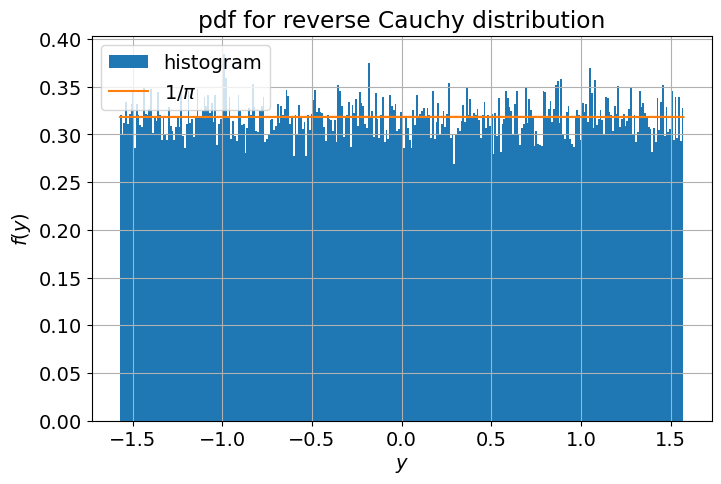

In [18]:
Y_I = np.arctan(X_I)
ypi = 1 / np.pi * np.ones_like(Y_I) 
plt.hist(Y_I, bins = numbins ,density = True, label = 'histogram')
plt.plot(Y_I, ypi, label = '1/$\pi$')
plt.grid(True); plt.legend();
plt.xlabel(r'$y$'); plt.ylabel(r'$f(y)$'); plt.title(r'pdf for reverse Cauchy distribution');

Does the shape of this agree with your result in part a)?  Explain.

Yes, it agrees with the result from part a). On the plot, we have added $1/\pi$ to show that the histogram can be approximated to that value. If we look at the solution for part a), we can see that pdf for Y would be $1/\pi$, but limited to $-\frac{\pi}{2} < y < \frac{\pi}{2}$. When we plot it, we see that the graph corresponds to that solution. It shows that the formula was derived correctly, as well as shows that the numerical solution is correct.